In [0]:
import zipfile
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model1/13%20by%2013/model1st13by13.zip"\
    -O "/tmp/model.zip"

zipFile = '/tmp/model.zip'
zip_ref   = zipfile.ZipFile(zipFile, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-11 10:57:37--  https://storage.googleapis.com/datsets/model1/13%20by%2013/model1st13by13.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5282864 (5.0M) [application/x-zip-compressed]
Saving to: ‘/tmp/model.zip’

/tmp/model.zip      100%[===================>]   5.04M  --.-KB/s    in 0.07s   

2020-04-11 10:57:37 (74.3 MB/s) - ‘/tmp/model.zip’ saved [5282864/5282864]



In [0]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/DRIVE.zip"\
    -O "/tmp/DRIVE.zip"

local_zip = '/tmp/DRIVE.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-11 10:57:41--  https://storage.googleapis.com/datsets/DRIVE.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29756930 (28M) [application/x-zip-compressed]
Saving to: ‘/tmp/DRIVE.zip’

/tmp/DRIVE.zip      100%[===================>]  28.38M   161MB/s    in 0.2s    

2020-04-11 10:57:41 (161 MB/s) - ‘/tmp/DRIVE.zip’ saved [29756930/29756930]



In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
model=tf.keras.models.load_model('/tmp/model1st13by13.hdf5')

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              820224    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 1,346,433
Trainable params: 1,346,433
Non-trainable params: 0
______________________________________________

In [0]:
import subprocess,sys
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model1/13%20by%2013/patches13n13test.zip"\
    -O "/tmp/patchestest.zip"

zipFile = '/tmp/patchestest.zip'
destinationDirectory='/tmp'
subprocess.Popen(["7z", "e", f"{zipFile}", f"-o{destinationDirectory}", "-y"])


--2020-04-11 10:57:56--  https://storage.googleapis.com/datsets/model1/13%20by%2013/patches13n13test.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31433193 (30M) [application/x-zip-compressed]
Saving to: ‘/tmp/patchestest.zip’

/tmp/patchestest.zi 100%[===================>]  29.98M   132MB/s    in 0.2s    

2020-04-11 10:57:57 (132 MB/s) - ‘/tmp/patchestest.zip’ saved [31433193/31433193]



In [0]:
import numpy
test= numpy.load('/tmp/patches13n13test.npy')
test.shape

(659920, 13, 13, 3)

In [0]:
predict=model.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
predict.shape

(659920, 1)

In [0]:
img1=predict[:329960]*255
img_plot=numpy.reshape(img1,(584,565)).astype('uint8')
img_plot.shape

(584, 565)

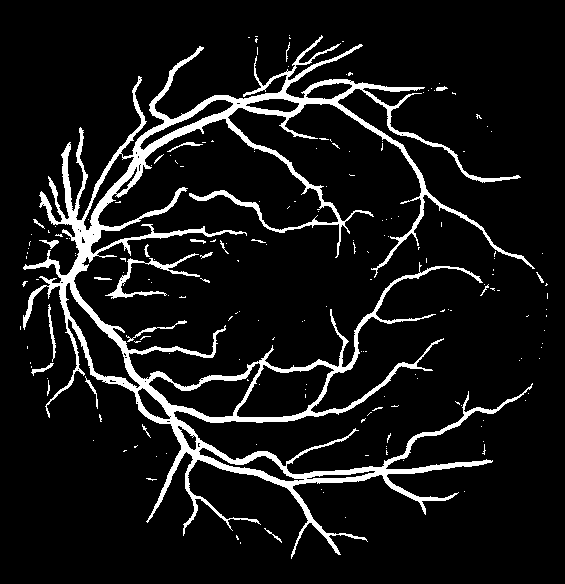

In [0]:
from PIL import Image
img = Image.fromarray(img_plot)
man1=Image.open('/tmp/DRIVE/test/1st_manual/01_manual1.gif')
man2=Image.open('/tmp/DRIVE/test/2nd_manual/01_manual2.gif')
img.save('/content/prediction1.jpg')
img
# man1
# man2
# img.save('1.jpg')

In [0]:
img2=predict[329960:]*255

In [0]:
img2.shape

(329960, 1)

In [0]:
img1_plot=numpy.reshape(img2,(584,565)).astype('uint8')

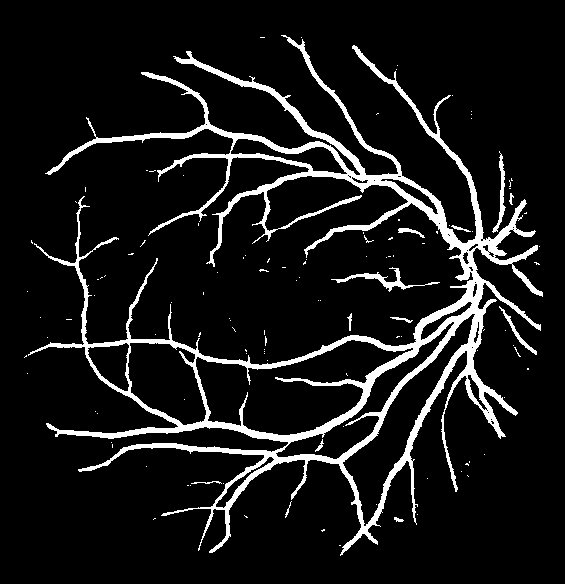

In [0]:
from PIL import Image
img = Image.fromarray(img1_plot)
img

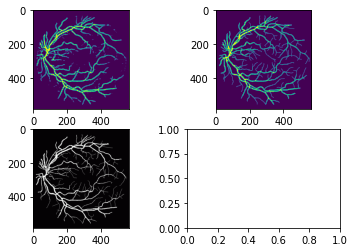

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
img1=mpimg.imread('/content/prediction1.jpg')
img2=mpimg.imread('/tmp/DRIVE/test/1st_manual/01_manual1.gif')
img3=mpimg.imread('/tmp/DRIVE/test/2nd_manual/01_manual2.gif')
fig, ax = plt.subplots(2,2)
ax[0][0].imshow(img1);
ax[0][1].imshow(img2);
ax[1][0].imshow(img3)